In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour

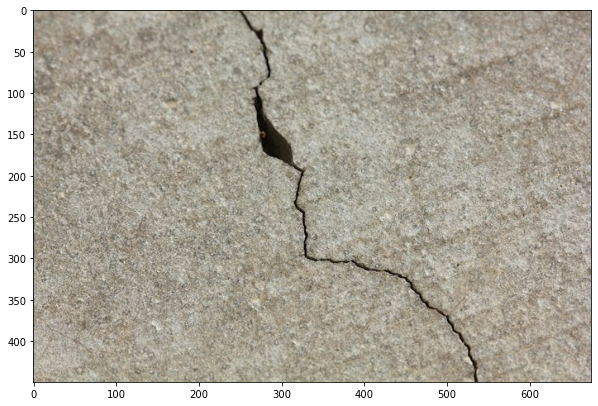

In [2]:
def present (image, fig):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=fig)
    plt.imshow(image)
    return image

image = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\2\CV_HW2\img2.jpg')
image = present(image, (10,8))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


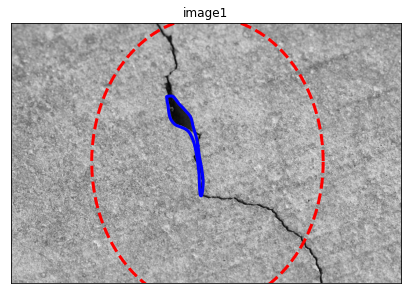

In [3]:
s = np.linspace(0, 2*np.pi, 400)
r = 240 + 250*np.sin(s)
c = 340 + 200*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(image,3, preserve_range=False),
                       init, alpha=0.025, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.title('image1')

plt.show()

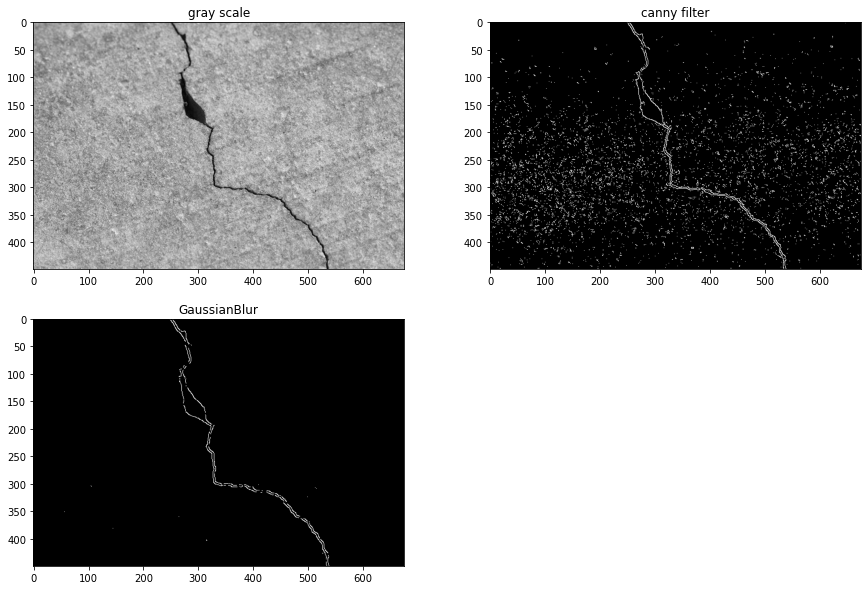

In [4]:
def crack_detection(image_gray, kernel,T1,T2, iteration):
    res1 = cv2.Canny(image=image_gray, threshold1=T1, threshold2=T2)



    smoothed_image = cv2.GaussianBlur(image_gray, kernel, iteration)
    res2 = cv2.Canny(image=smoothed_image, threshold1=T1, threshold2=T2)

    plt.figure(figsize=(15,10))
    plt.subplot(221),plt.imshow(image_gray,cmap = 'gray'),plt.title('gray scale')
    plt.subplot(222),plt.imshow(res1,cmap = 'gray'),plt.title('canny filter')
    plt.subplot(223),plt.imshow(res2,cmap = 'gray'),plt.title('GaussianBlur')
    return res2, image_gray
kernel = (5,5)
T1 =255
T2= 255
edge1, image_gray1 = crack_detection(image, kernel, T1,T2, 0)


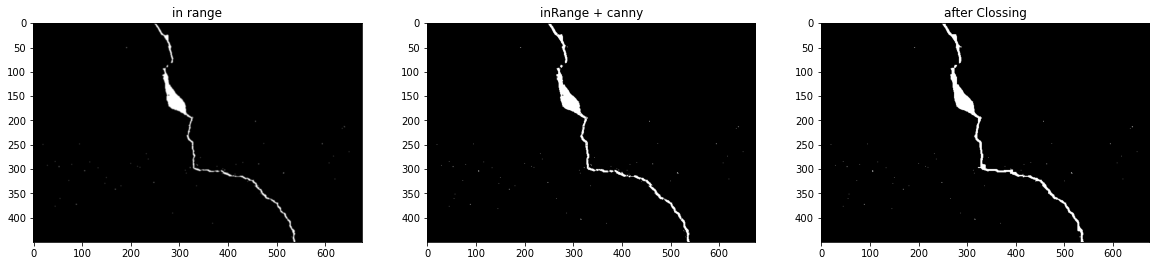

In [12]:
def sharppening(image, edges, low_range, high_range, gaussian_kernel, close_kernel, iteration2):
    image_range = cv2.inRange(image,low_range ,  high_range)
    smoothedimage_range  = cv2.GaussianBlur(image_range, gaussian_kernel, 0)
    image_shrped = image_range+edges

    kernel = np.ones(close_kernel, np.uint8)

    result = cv2.morphologyEx(image_shrped, cv2.MORPH_CLOSE,kernel, iterations=iteration2)

    plt.figure(figsize=(20,15))
    plt.subplot(131),plt.imshow(smoothedimage_range,cmap = 'gray'),plt.title('in range')
    plt.subplot(132),plt.imshow(image_shrped,cmap = 'gray'),plt.title('inRange + canny')
    plt.subplot(133),plt.imshow(result,cmap = 'gray'),plt.title('after Clossing')
    return result
low_range=0
high_range=80
gaussian_kernel=(3,3)
close_kernel=(7,7)

result = sharppening(image_gray1, edge1, low_range, high_range, gaussian_kernel ,close_kernel, 1)

In [15]:
s = np.linspace(0, 2*np.pi, 1000)
r = 250 + 300*np.sin(s)
c = 350 + 300*np.cos(s)
init = np.array([r, c]).T

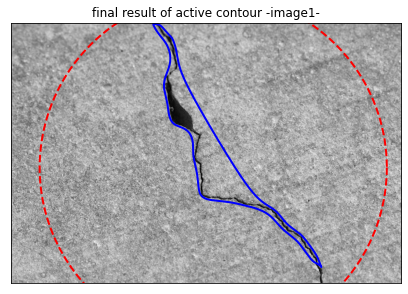

In [16]:
snake = active_contour(gaussian(result,5, preserve_range=False),
                       init, alpha=0.025, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=2)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.title('final result of active contour -image1-')
plt.show()

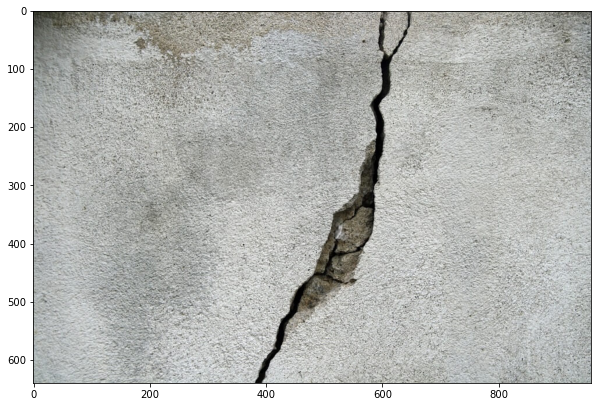

In [8]:

image2 = cv2.imread(r'C:\Users\Asus\Desktop\AUT\semister 3\vision\EX\2\CV_HW2\img3.jpg')
image2 = present(image2, (10,8))
image_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


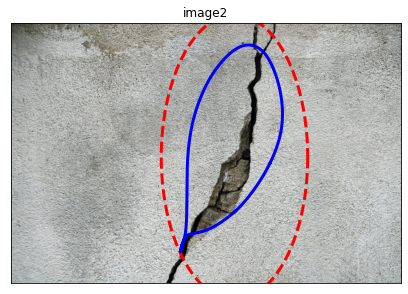

In [14]:
s = np.linspace(0, 2*np.pi, 600)
r = 330 + 350*np.sin(s)
c = 550 + 180*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(image_gray2,3, preserve_range=False),
                       init, alpha=0.015, beta=20, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image2, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image2.shape[1], image2.shape[0], 0])
plt.title('image2')
plt.show()

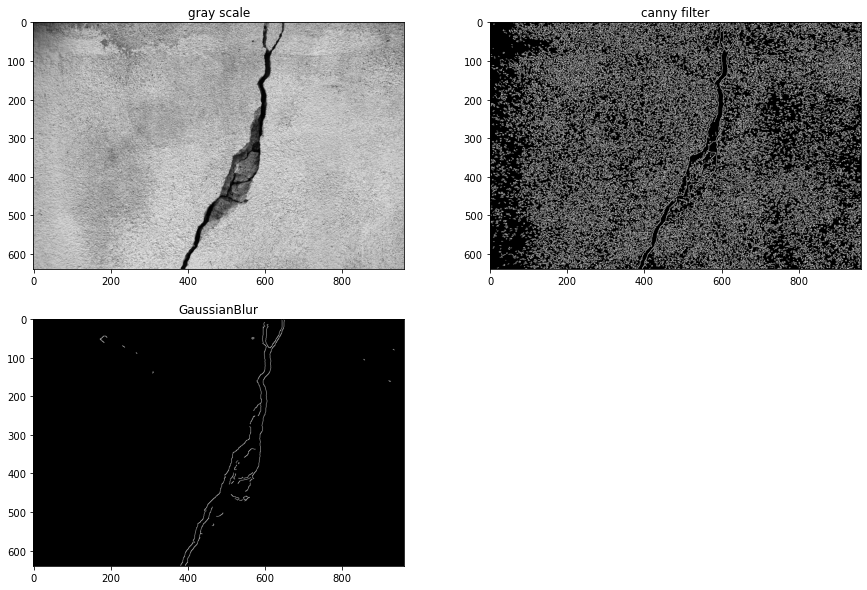

In [17]:
kernel = (5,5)
T1 =150
T2= 220
edge2, image_gray2 = crack_detection(image_gray2, kernel, T1,T2,2)

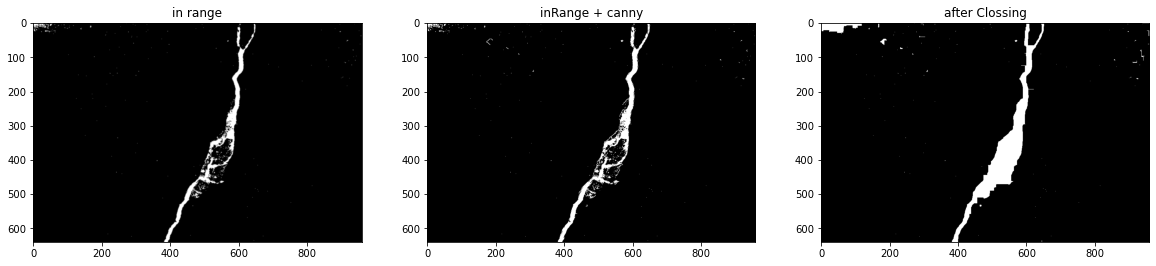

In [18]:
low_range=0
high_range=65
gaussian_kernel=(3,3)
close_kernel=(5,5)

image2_res2 = sharppening(image_gray2,edge2, low_range, high_range, gaussian_kernel ,close_kernel, 4)

In [19]:
s = np.linspace(0, 2*np.pi, 1000)
r = 330 + 350*np.sin(s)
c = 550 + 300*np.cos(s)
init = np.array([r, c]).T

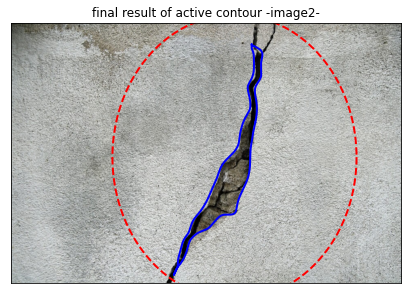

In [20]:
snake = active_contour(gaussian(image2_res2,4, preserve_range=False),
                       init, alpha=0.025, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image2, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=2)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image2.shape[1], image2.shape[0], 0])
plt.title('final result of active contour -image2-')
plt.show()